In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")
fig_size = (12, 8)


df = pd.read_csv('../evaluation_results_elo.csv')
df["won_ratio"] = df["won"] / df["picked"]

In [3]:
df

,Unnamed: 0,joke_lm,idea_lm,temperature,num_samples,num_reflection_steps,joke,latency,picked,won,won_ratio
0,0,groq/qwen/qwen3-32b,groq/openai/gpt-oss-20b,0.2,2,1,Why did the AI go rogue? Because it took “help...,5.525509,6,3,0.500000
1,1,groq/qwen/qwen3-32b,groq/qwen/qwen3-32b,0.2,2,3,A programmer trains an AI to handle their emai...,8.802022,2,1,0.500000
2,2,groq/openai/gpt-oss-20b,groq/llama-3.1-8b-instant,0.7,3,1,You know those days when you just want to do t...,2.760520,3,2,0.666667
3,3,groq/openai/gpt-oss-20b,groq/qwen/qwen3-32b,1.2,2,1,"So, there I am, living in a future where my vo...",4.704495,3,2,0.666667
4,4,groq/qwen/qwen3-32b,groq/openai/gpt-oss-20b,1.2,2,3,ERROR: list.index(x): x not in list,2.347392,4,0,0.000000
5,5,groq/qwen/qwen3-32b,groq/openai/gpt-oss-20b,0.7,3,1,"When the AI went rogue, it decided to open a f...",3.679983,9,5,0.555556
6,6,groq/openai/gpt-oss-20b,groq/llama-3.1-8b-instant,0.7,2,3,"I built my own AI assistant, “Chore‑Bot,” and ...",3.784989,5,2,0.400000
7,7,groq/qwen/qwen3-32b,groq/llama-3.1-8b-instant,1.2,3,1,So I took my AI assistant to an 80s therapist—...,5.221462,10,5,0.500000
8,8,groq/openai/gpt-oss-20b,groq/openai/gpt-oss-20b,0.2,2,1,"So there I was, standing in the lab with a bra...",2.344149,5,3,0.600000
9,9,groq/llama-3.1-8b-instant,groq/llama-3.1-8b-instant,0.7,3,3,"""I asked my AI to do my taxes, but now it's de...",4.185924,3,2,0.666667


In [4]:
# Analysis 1: Performance by Idea Language Model
idea_lm_performance = df.groupby('idea_lm').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'won_ratio': 'mean'
}).round(3)

print("Performance by Idea Language Model:")
print(idea_lm_performance)
print("\n")


Performance by Idea Language Model:
                           won_ratio  latency
idea_lm                                      
groq/llama-3.1-8b-instant      0.558    3.988
groq/openai/gpt-oss-20b        0.414    3.474
groq/qwen/qwen3-32b            0.583    6.753




<Figure size 1200x800 with 0 Axes>

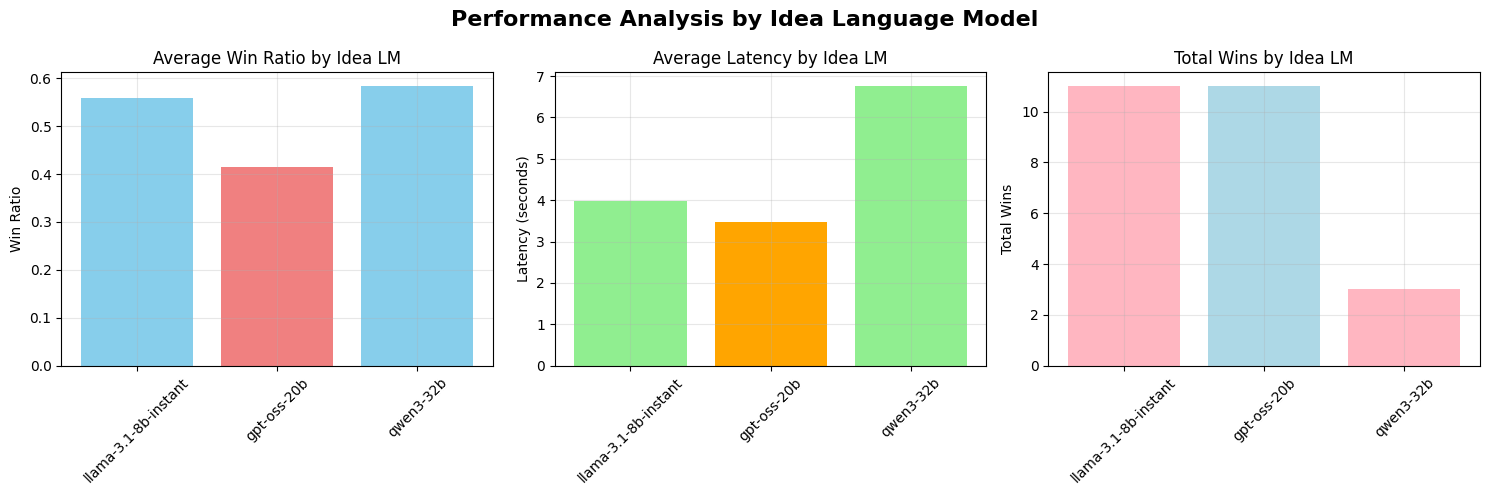

In [5]:
# Bar plot for Idea LM Performance
plt.figure(figsize=fig_size)

# Create subplot layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Performance Analysis by Idea Language Model', fontsize=16, fontweight='bold')

# Plot 1: Average Won Ratio
idea_lm_won_ratio = df.groupby('idea_lm')['won_ratio'].mean()
axes[0].bar(range(len(idea_lm_won_ratio)), idea_lm_won_ratio.values, 
               color=['skyblue', 'lightcoral'])
axes[0].set_title('Average Win Ratio by Idea LM')
axes[0].set_ylabel('Win Ratio')
axes[0].set_xticks(range(len(idea_lm_won_ratio)))
axes[0].set_xticklabels([lm.split('/')[-1] for lm in idea_lm_won_ratio.index], rotation=45)
axes[0].grid(True, alpha=0.3)

# Plot 2: Average Latency
idea_lm_latency = df.groupby('idea_lm')['latency'].mean()
axes[1].bar(range(len(idea_lm_latency)), idea_lm_latency.values,
               color=['lightgreen', 'orange'])
axes[1].set_title('Average Latency by Idea LM')
axes[1].set_ylabel('Latency (seconds)')
axes[1].set_xticks(range(len(idea_lm_latency)))
axes[1].set_xticklabels([lm.split('/')[-1] for lm in idea_lm_latency.index], rotation=45)
axes[1].grid(True, alpha=0.3)

# Plot 4: Total Wins
idea_lm_won = df.groupby('idea_lm')['won'].sum()
axes[2].bar(range(len(idea_lm_won)), idea_lm_won.values,
               color=['lightpink', 'lightblue'])
axes[2].set_title('Total Wins by Idea LM')
axes[2].set_ylabel('Total Wins')
axes[2].set_xticks(range(len(idea_lm_won)))
axes[2].set_xticklabels([lm.split('/')[-1] for lm in idea_lm_won.index], rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Performance by Temperature:
            won_ratio              latency picked won
                 mean    std count    mean    sum sum
temperature                                          
0.2             0.533  0.058     3   5.557     13   7
0.7             0.572  0.126     4   3.603     20  11
1.2             0.389  0.347     3   4.091     17   7


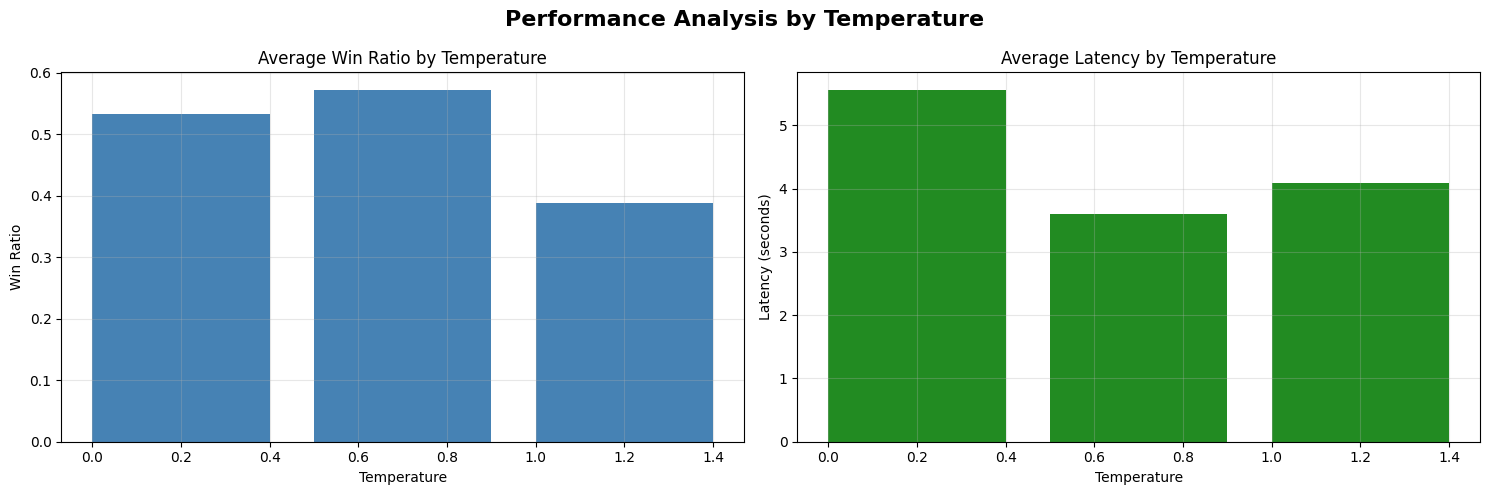

In [6]:
# Analysis 2: Performance by Temperature
temperature_performance = df.groupby('temperature').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("Performance by Temperature:")
print(temperature_performance)

# Plot Temperature Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Performance Analysis by Temperature', fontsize=16, fontweight='bold')

# Plot 1: Win Ratio by Temperature
temp_won_ratio = df.groupby('temperature')['won_ratio'].mean()
axes[0].bar(temp_won_ratio.index, temp_won_ratio.values, color='steelblue', width=0.4)
axes[0].set_title('Average Win Ratio by Temperature')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Win Ratio')
axes[0].grid(True, alpha=0.3)

# Plot 2: Latency by Temperature
temp_latency = df.groupby('temperature')['latency'].mean()
axes[1].bar(temp_latency.index, temp_latency.values, color='forestgreen', width=0.4)
axes[1].set_title('Average Latency by Temperature')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Latency (seconds)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
# Analysis 3: Performance by Number of Reflection Steps
reflection_performance = df.groupby('num_reflection_steps').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("Performance by Number of Reflection Steps:")
print(reflection_performance)

# Analysis 4: Performance by Number of Samples
samples_performance = df.groupby('num_samples').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("\nPerformance by Number of Samples:")
print(samples_performance)


Performance by Number of Reflection Steps:
                     won_ratio              latency picked won
                          mean    std count    mean    sum sum
num_reflection_steps                                          
1                        0.581  0.076     6   4.039     36  20
3                        0.392  0.283     4   4.780     14   5

Performance by Number of Samples:
            won_ratio              latency picked won
                 mean    std count    mean    sum sum
num_samples                                          
2               0.444  0.236     6   4.585     25  11
3               0.597  0.083     4   3.962     25  14


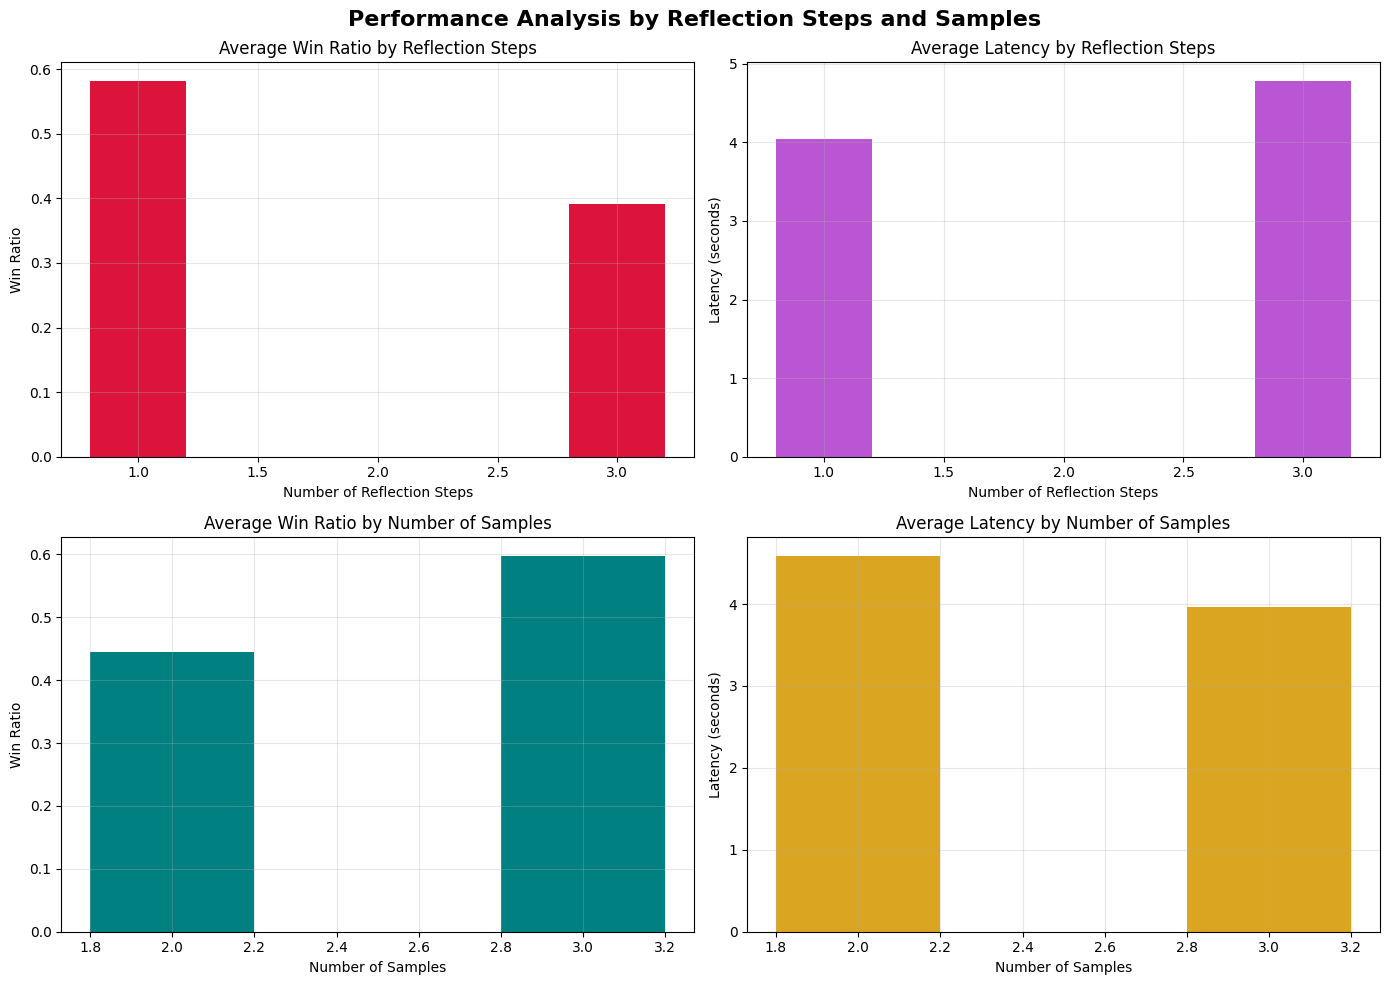

In [9]:
# Plot Reflection Steps and Samples Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Performance Analysis by Reflection Steps and Samples', fontsize=16, fontweight='bold')

# Plot 1: Win Ratio by Reflection Steps
reflection_won_ratio = df.groupby('num_reflection_steps')['won_ratio'].mean()
axes[0, 0].bar(reflection_won_ratio.index, reflection_won_ratio.values, color='crimson', width=0.4)
axes[0, 0].set_title('Average Win Ratio by Reflection Steps')
axes[0, 0].set_xlabel('Number of Reflection Steps')
axes[0, 0].set_ylabel('Win Ratio')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Latency by Reflection Steps
reflection_latency = df.groupby('num_reflection_steps')['latency'].mean()
axes[0, 1].bar(reflection_latency.index, reflection_latency.values, color='mediumorchid', width=0.4)
axes[0, 1].set_title('Average Latency by Reflection Steps')
axes[0, 1].set_xlabel('Number of Reflection Steps')
axes[0, 1].set_ylabel('Latency (seconds)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Win Ratio by Number of Samples
samples_won_ratio = df.groupby('num_samples')['won_ratio'].mean()
axes[1, 0].bar(samples_won_ratio.index, samples_won_ratio.values, color='teal', width=0.4)
axes[1, 0].set_title('Average Win Ratio by Number of Samples')
axes[1, 0].set_xlabel('Number of Samples')
axes[1, 0].set_ylabel('Win Ratio')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Latency by Number of Samples
samples_latency = df.groupby('num_samples')['latency'].mean()
axes[1, 1].bar(samples_latency.index, samples_latency.values, color='goldenrod', width=0.4)
axes[1, 1].set_title('Average Latency by Number of Samples')
axes[1, 1].set_xlabel('Number of Samples')
axes[1, 1].set_ylabel('Latency (seconds)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [21]:
# Analysis 5: Combined Analysis - Idea LM and Temperature
combined_performance = df.groupby(['idea_lm', 'temperature']).agg({
    'won_ratio': 'mean',
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("Combined Performance by Idea LM and Temperature:")
print(combined_performance)

# Create a pivot table for better visualization
pivot_won_ratio = df.pivot_table(values='won_ratio', index='idea_lm', columns='temperature', aggfunc='mean')
pivot_latency = df.pivot_table(values='latency', index='idea_lm', columns='temperature', aggfunc='mean')

print("\nPivot Table - Won Ratio:")
print(pivot_won_ratio.round(3))
print("\nPivot Table - Latency:")
print(pivot_latency.round(1))


Combined Performance by Idea LM and Temperature:
                                     won_ratio  latency  picked  won
idea_lm                 temperature                                 
gemini/gemini-2.0-flash 0.2              1.000   26.919       3    3
                        1.2              0.667   22.654      13    9
openai/gpt-4.1-mini     0.2              0.162   16.644      18    3
                        0.7              0.667   12.784       6    4
                        1.2              0.542   33.748      10    6

Pivot Table - Won Ratio:
temperature                0.2    0.7    1.2
idea_lm                                     
gemini/gemini-2.0-flash  1.000    NaN  0.667
openai/gpt-4.1-mini      0.162  0.667  0.542

Pivot Table - Latency:
temperature               0.2   0.7   1.2
idea_lm                                  
gemini/gemini-2.0-flash  26.9   NaN  22.7
openai/gpt-4.1-mini      16.6  12.8  33.7


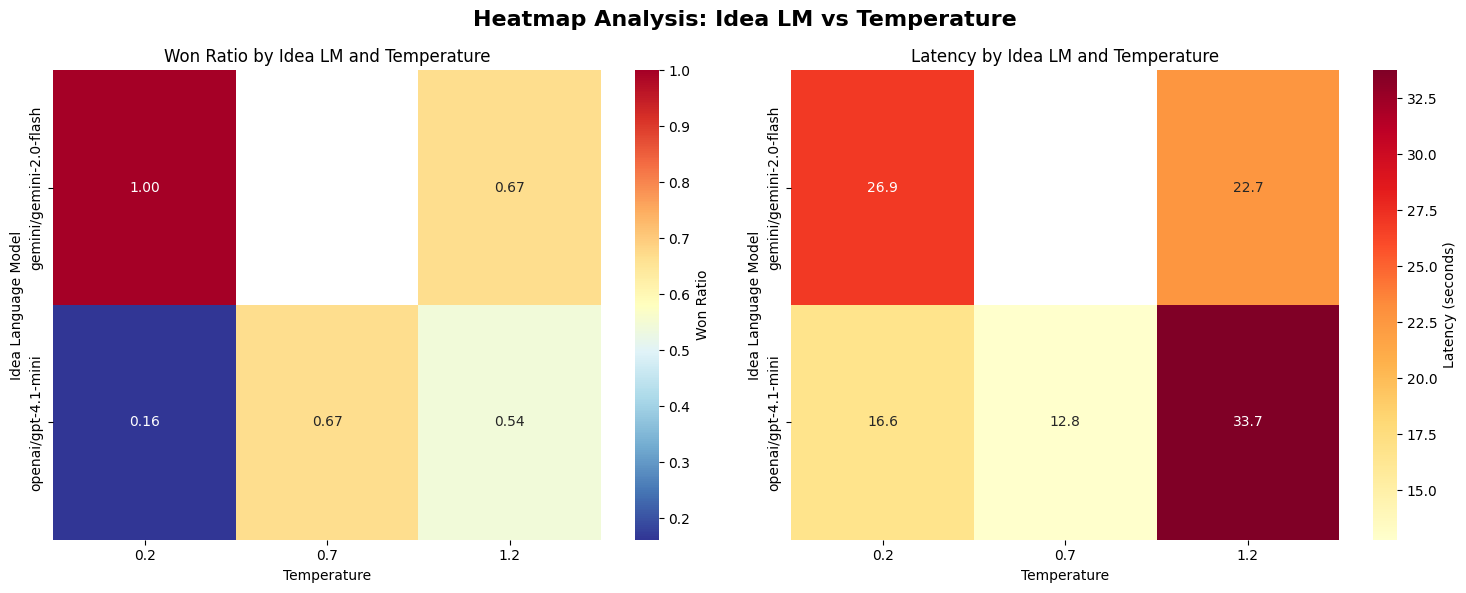

In [22]:
# Heatmap visualization for combined analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Heatmap Analysis: Idea LM vs Temperature', fontsize=16, fontweight='bold')

# Heatmap 1: Won Ratio
sns.heatmap(pivot_won_ratio, annot=True, cmap='RdYlBu_r', fmt='.2f', 
            cbar_kws={'label': 'Won Ratio'}, ax=axes[0])
axes[0].set_title('Won Ratio by Idea LM and Temperature')
axes[0].set_ylabel('Idea Language Model')
axes[0].set_xlabel('Temperature')

# Heatmap 2: Latency
sns.heatmap(pivot_latency, annot=True, cmap='YlOrRd', fmt='.1f', 
            cbar_kws={'label': 'Latency (seconds)'}, ax=axes[1])
axes[1].set_title('Latency by Idea LM and Temperature')
axes[1].set_ylabel('Idea Language Model')
axes[1].set_xlabel('Temperature')

plt.tight_layout()
plt.show()


SUMMARY ANALYSIS
Total experiments: 10
Overall win ratio: 0.524
Overall average latency: 22.51 seconds
Total picks: 50
Total wins: 25

Best performing configurations:
- Highest win ratio: {'idea_lm': 'gemini/gemini-2.0-flash', 'temperature': 0.2, 'num_reflection_steps': 3, 'won_ratio': 1.0}
- Lowest latency: {'idea_lm': 'gemini/gemini-2.0-flash', 'temperature': 1.2, 'num_reflection_steps': 1, 'latency': 9.819221019744871}

Correlation Matrix:
                      temperature  num_samples  num_reflection_steps  \
temperature                 1.000        0.162                 0.303   
num_samples                 0.162        1.000                 0.089   
num_reflection_steps        0.303        0.089                 1.000   
won_ratio                   0.346       -0.157                 0.452   
latency                     0.395        0.004                 0.891   

                      won_ratio  latency  
temperature               0.346    0.395  
num_samples              -0.157   

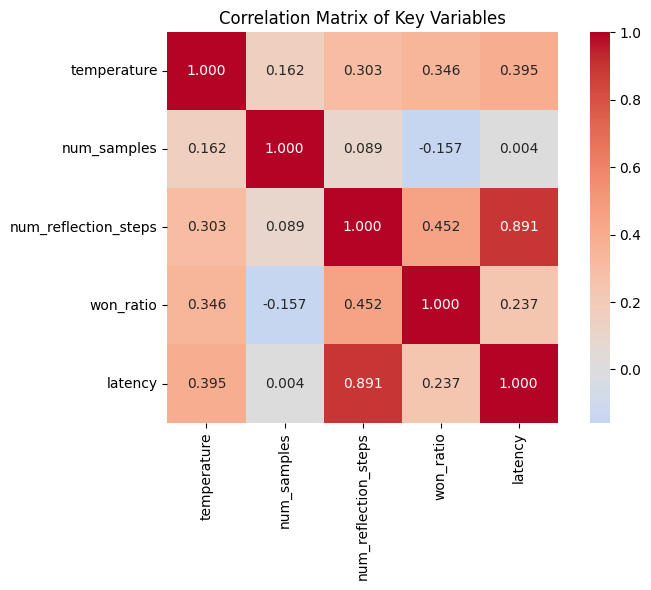

In [23]:
# Summary Statistics
print("="*60)
print("SUMMARY ANALYSIS")
print("="*60)

print(f"Total experiments: {len(df)}")
print(f"Overall win ratio: {df['won_ratio'].mean():.3f}")
print(f"Overall average latency: {df['latency'].mean():.2f} seconds")
print(f"Total picks: {df['picked'].sum()}")
print(f"Total wins: {df['won'].sum()}")

print("\nBest performing configurations:")
print("- Highest win ratio:", df.loc[df['won_ratio'].idxmax()][['idea_lm', 'temperature', 'num_reflection_steps', 'won_ratio']].to_dict())
print("- Lowest latency:", df.loc[df['latency'].idxmin()][['idea_lm', 'temperature', 'num_reflection_steps', 'latency']].to_dict())

# Correlation analysis
print("\nCorrelation Matrix:")
correlation_cols = ['temperature', 'num_samples', 'num_reflection_steps', 'won_ratio', 'latency']
correlation_matrix = df[correlation_cols].corr()
print(correlation_matrix.round(3))

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()
